# This notebook loads trajectories of a Kerr system in the qubit regime and applies machine learning algorithms to learn about the manifold the trajectory spans.

In [1]:
Regime = "kerr_bistable" ## used to load appropraite file

#  loading trajectory and using manifold learning from scikit learn

In [2]:
## load trajectory data from file
import pickle

## manifold learning with sklearn
from sklearn import manifold

## numerical
import numpy as np

## plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm

In [3]:
def show_colorbar(x_index, name):
    ## show color scheme
    # http://matplotlib.org/examples/color/colormaps_reference.html

    gradient = np.linspace(0, 1, x_index)
    gradient = np.vstack((gradient, gradient))

    fig, axes = plt.subplots(figsize=(24,2))
    axes.set_title( ' colormaps', fontsize=14)
    axes.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))

    plt.show()

In [4]:
def colored_3d_plot(data):
    ## Figure 
    fig = plt.figure(figsize=(24,20))
    ax = fig.add_subplot(111, projection='3d')
    to_plot_=[[x[i] for x in data] for i in xrange(0,3)]

    x_index = len(np.asarray(to_plot_).T)/params['Ntraj']

    color_list = np.concatenate([np.linspace(0, 1, x_index)] * params['Ntraj'])
    colors = cm.jet(color_list)
    ax.scatter(*to_plot_,c=colors)

    show_colorbar(x_index,'jet')

## Use ISOMAP on all trajectories, sampled at 1/100 points.

In [5]:
## load trajectory data from file
pkl_file = open('./trajectory_data/'+ Regime +'.pkl', 'rb')
(params,SLH,data_traj) = pickle.load(pkl_file)
pkl_file.close()

traj1 = data_traj[0::100]

In [6]:
## learn isomap
iso = manifold.Isomap(n_neighbors=70, n_components=3)

## transform different points, used for cross-validation. Doesn't really matter for figure.
data = iso.fit(traj1).transform(traj1)

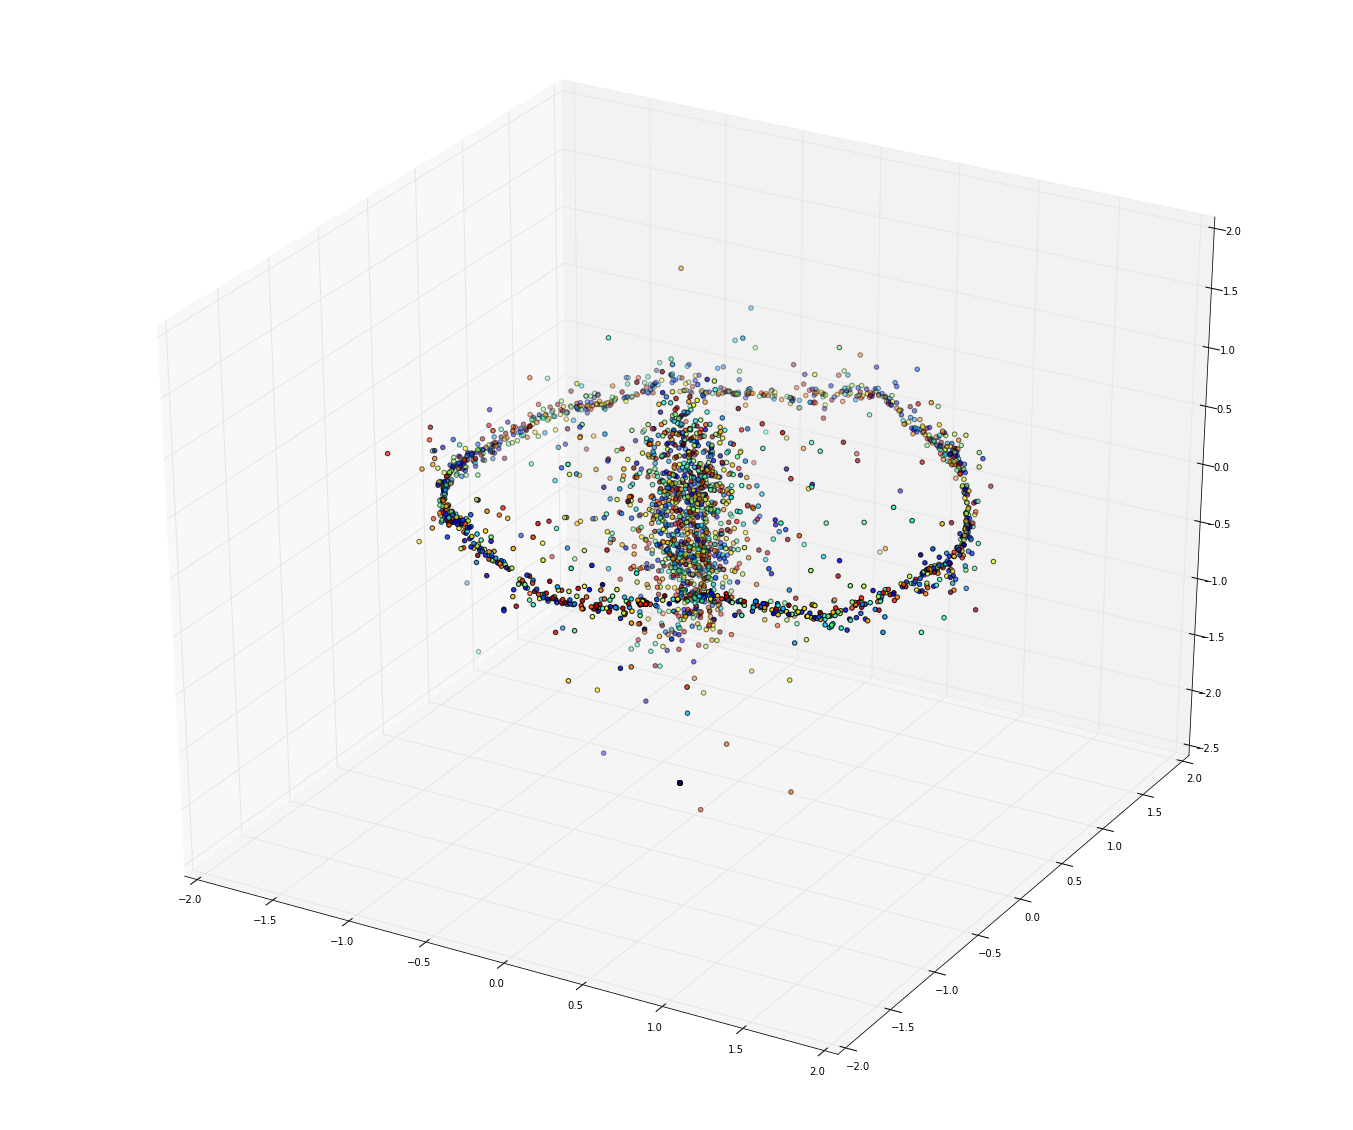

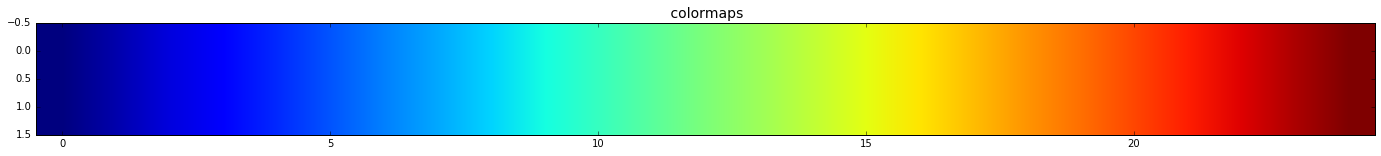

In [7]:
colored_3d_plot(data)

## The shape above resembles the Hopf fibration. This can be explained if the states with the global phase removed lie on a circle on the Bloch sphere. See http://nilesjohnson.net/hopf.html

## What happens if we apply the algorithm at different times (to all trajectories). We split time to chunks of `slice_len`. 

In [8]:
Ntraj = params['Ntraj']
duration = params['duration']

In [13]:
slice_len = 400
downsample = 10
trajs = np.split(data_traj,Ntraj)
traj_overtime = [np.concatenate([t[slice_len*i : slice_len*(i+1)] for t in trajs])[0::downsample] for i in range(int(duration/slice_len))]

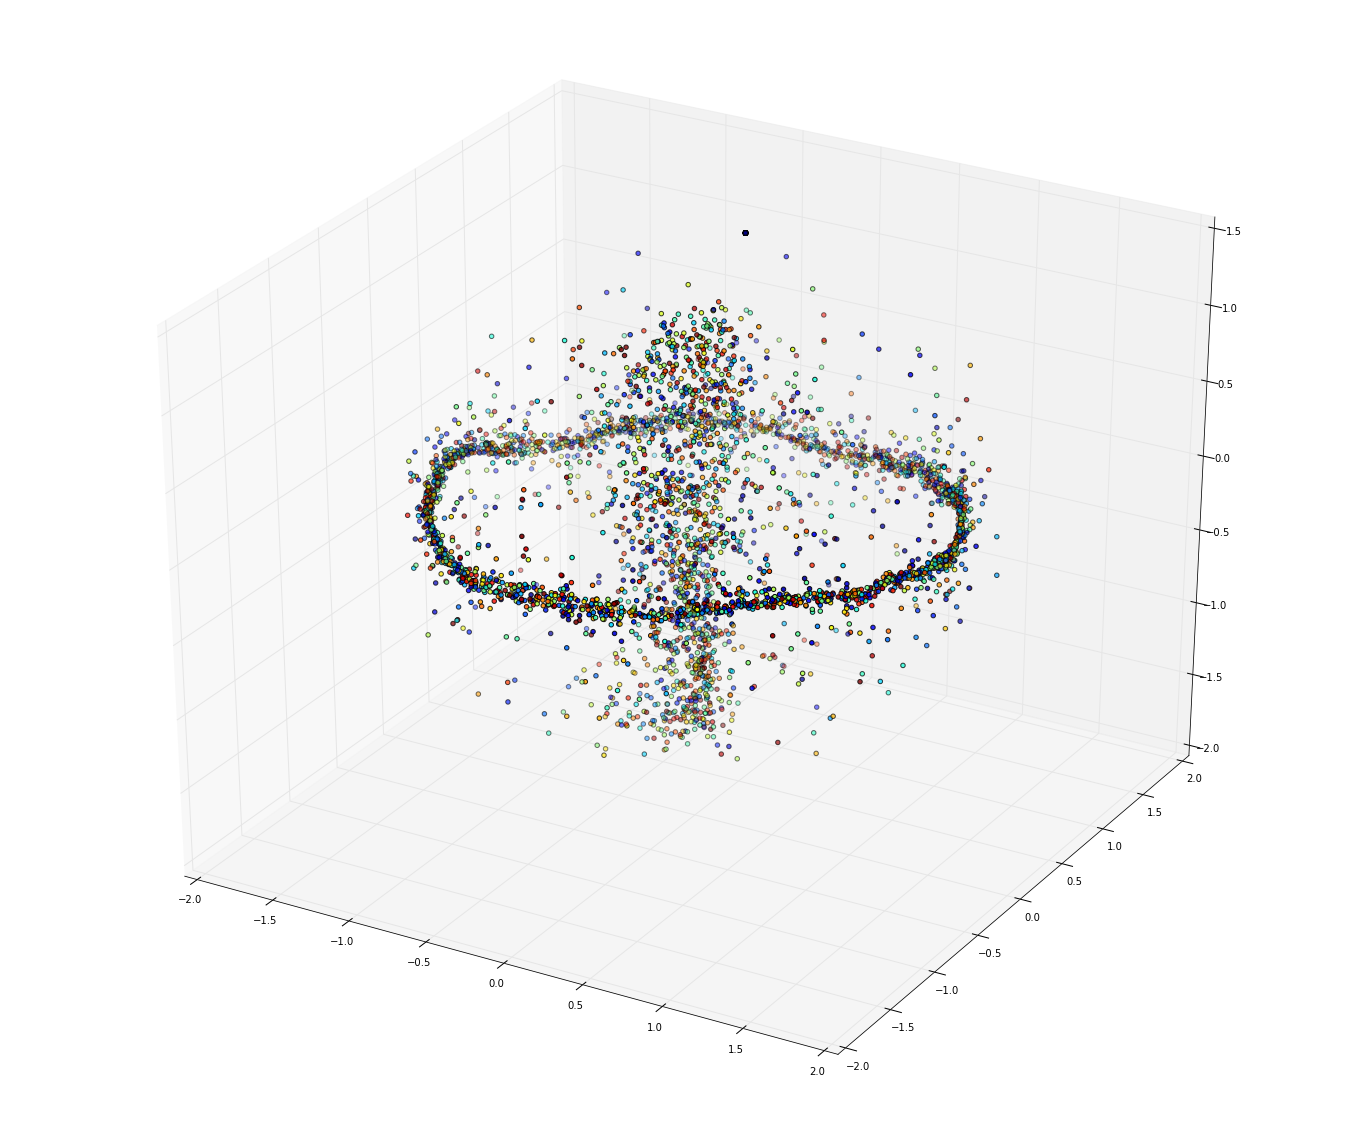

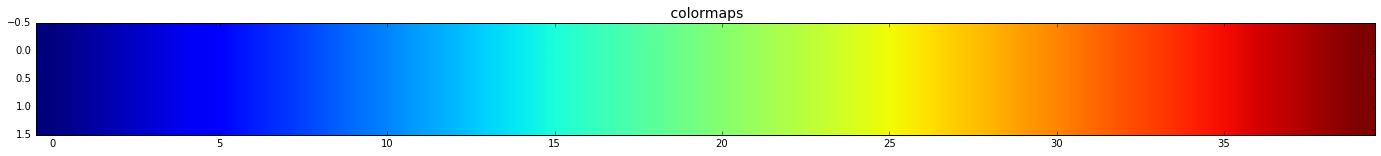

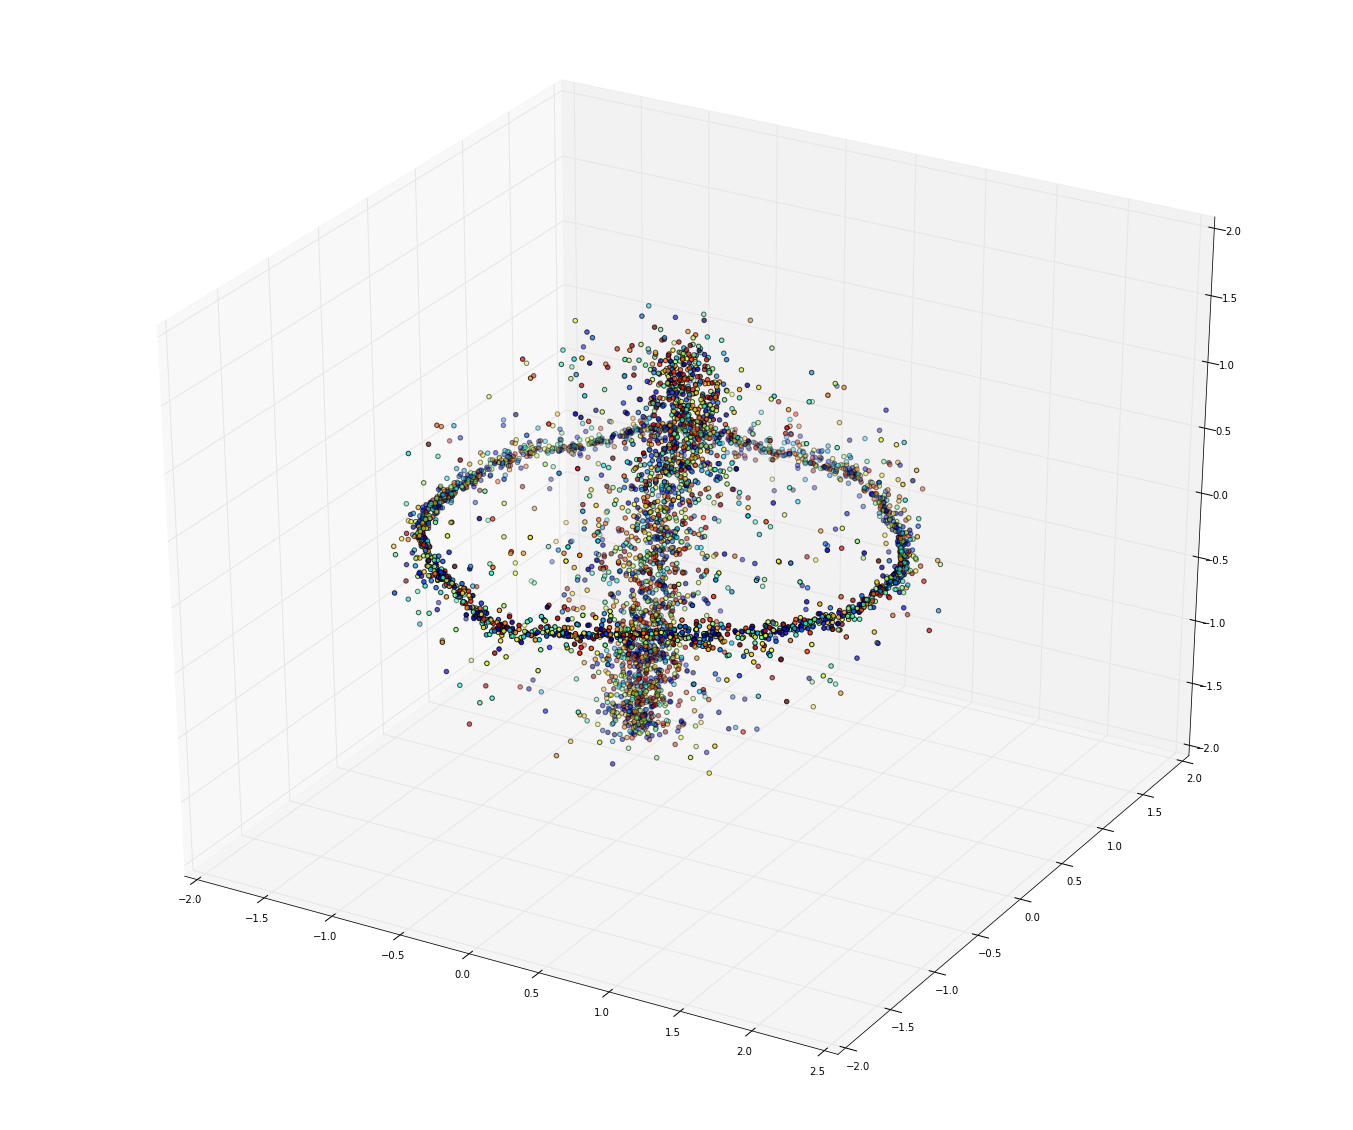

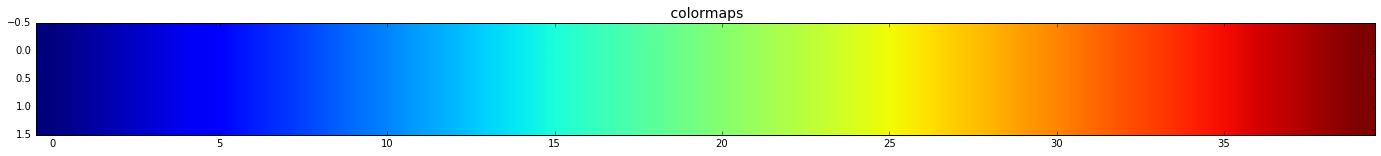

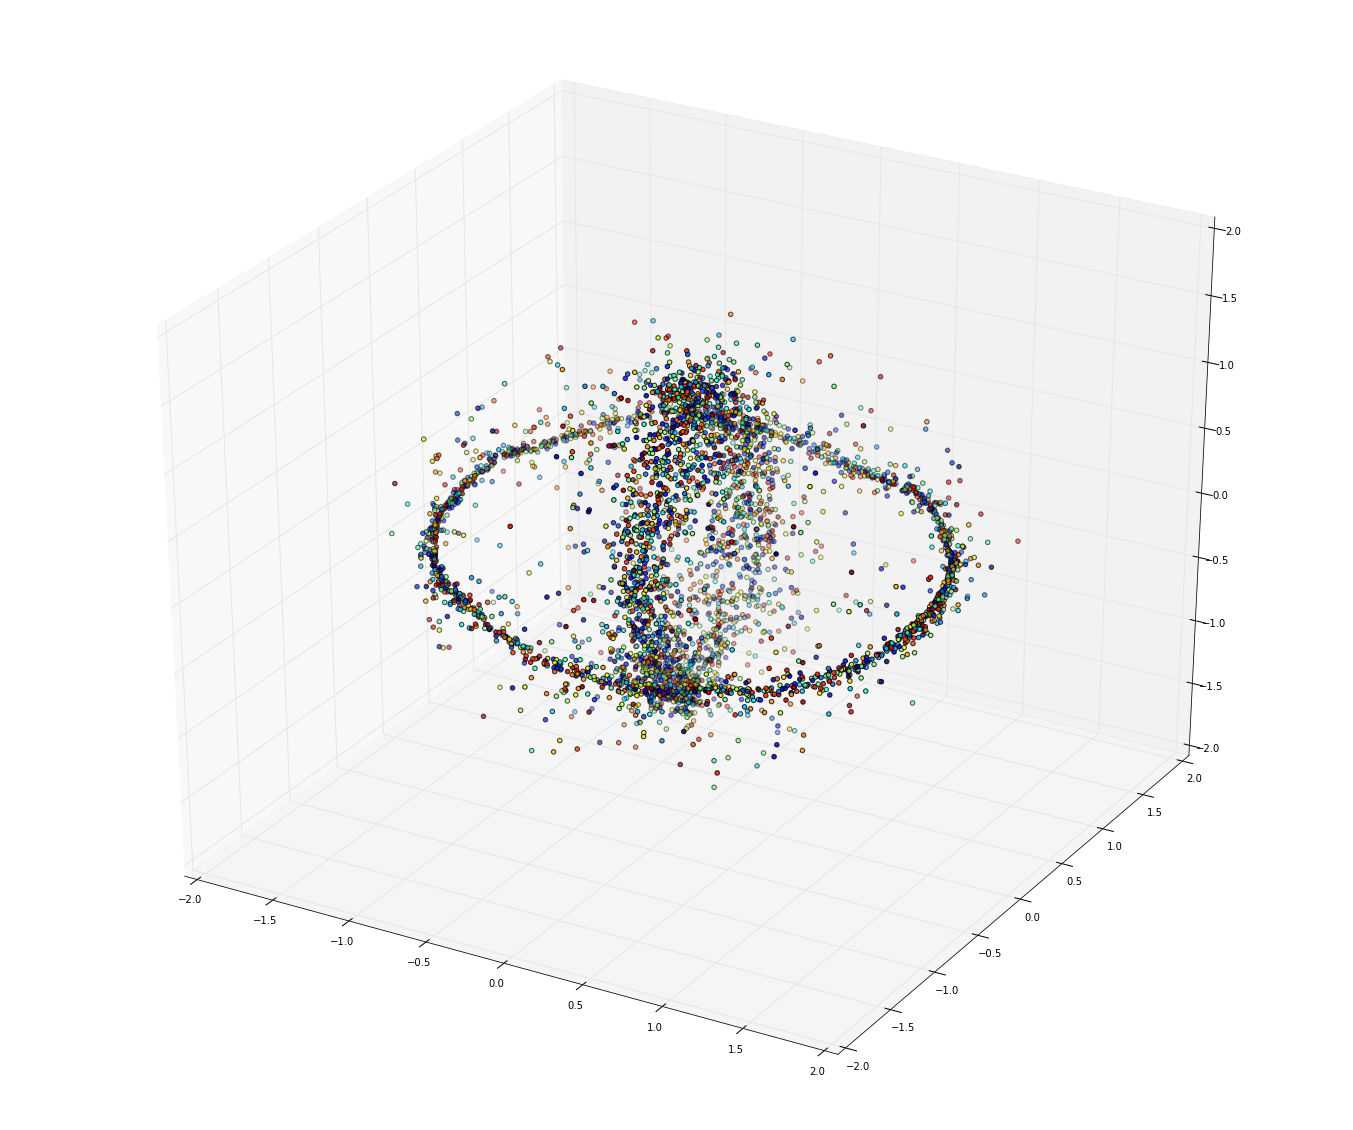

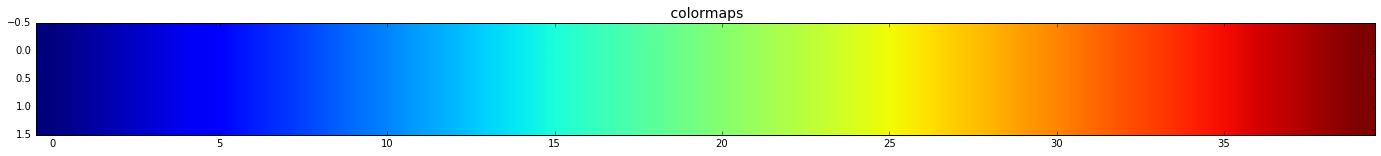

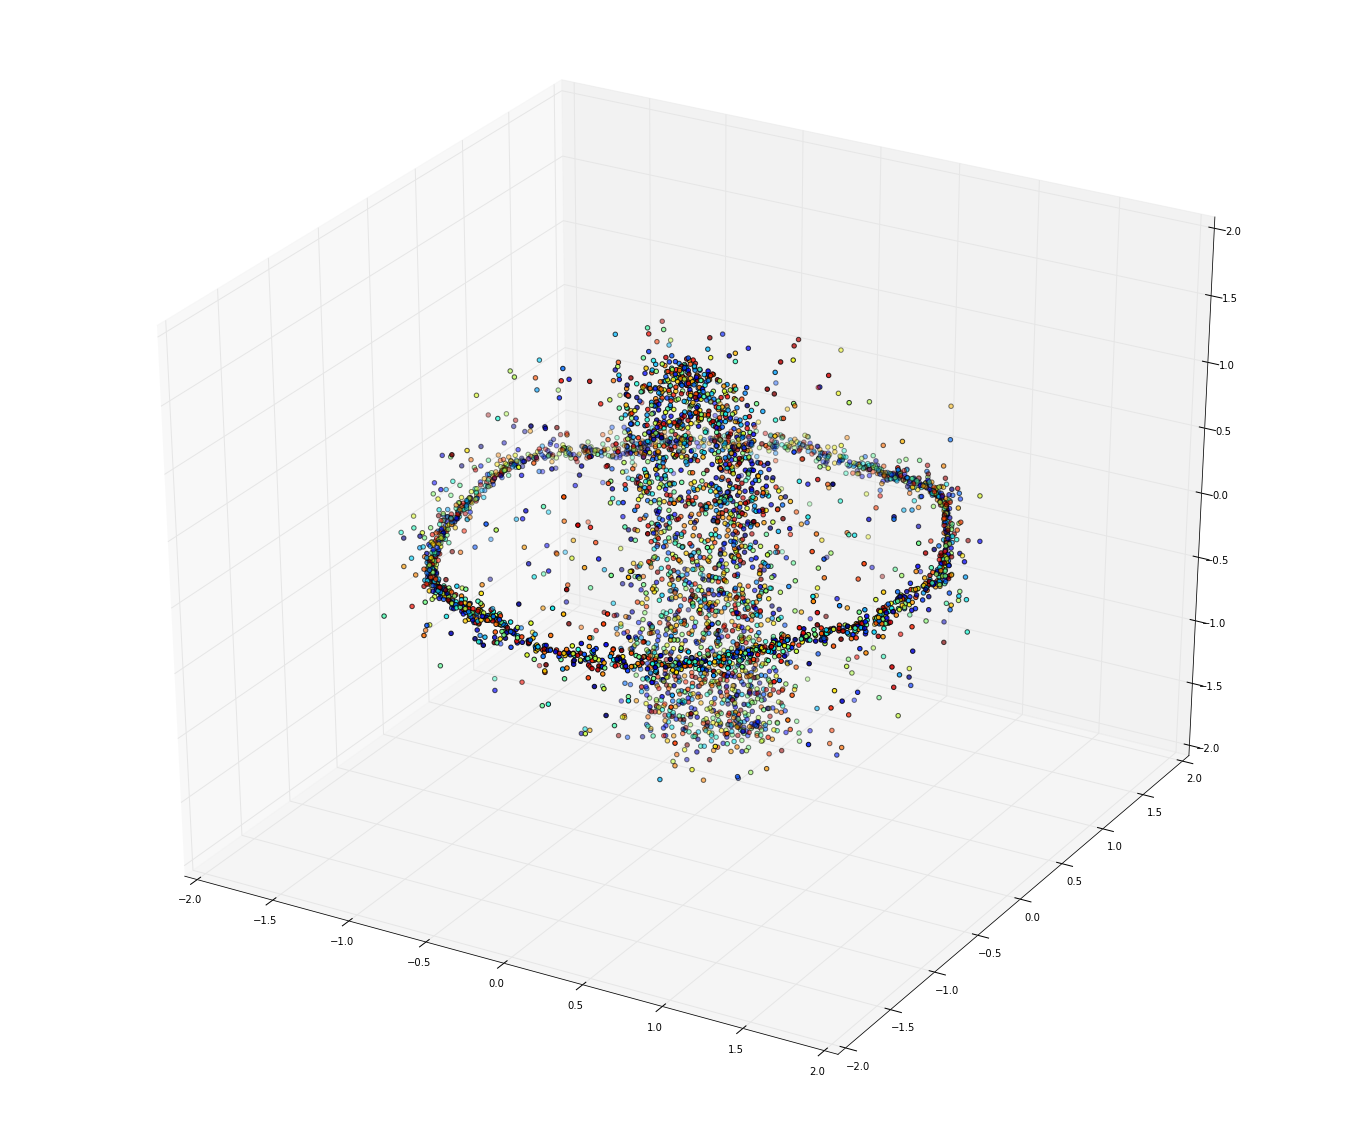

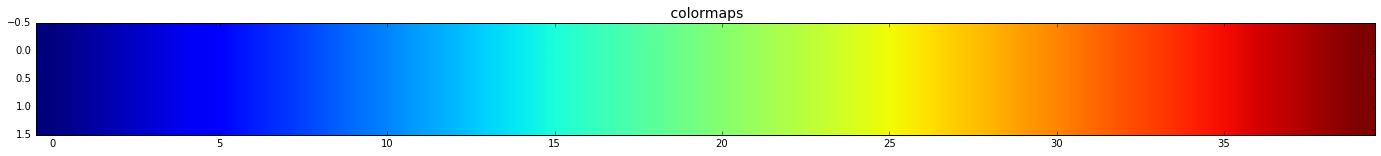

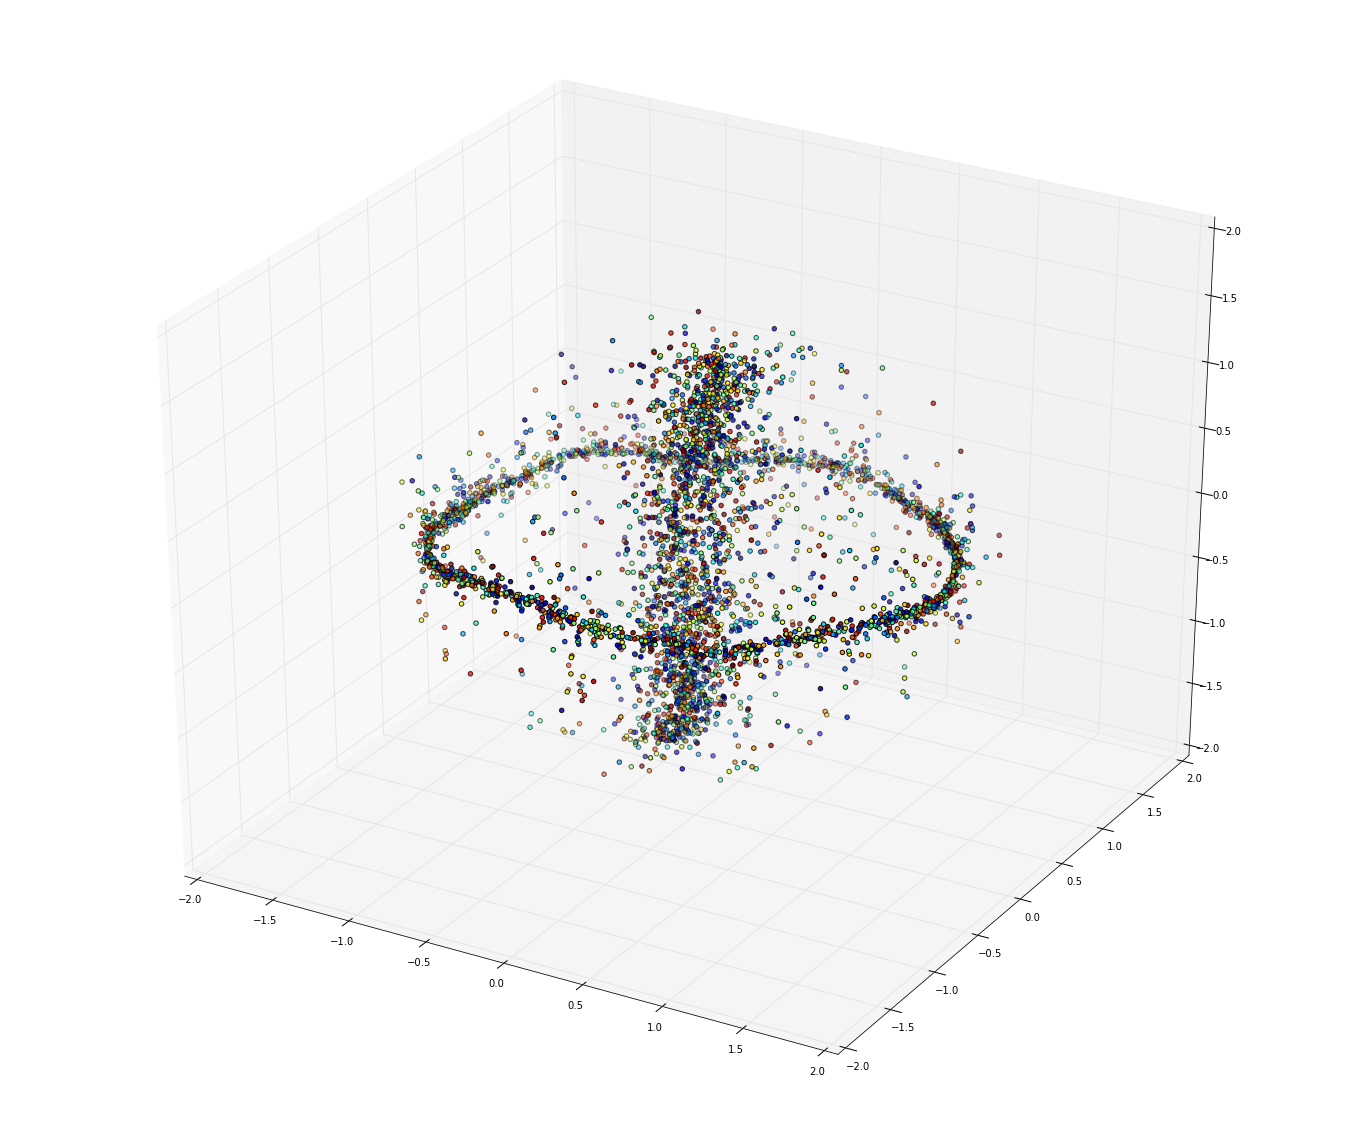

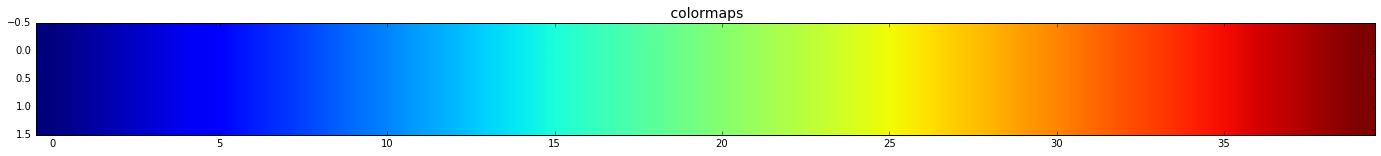

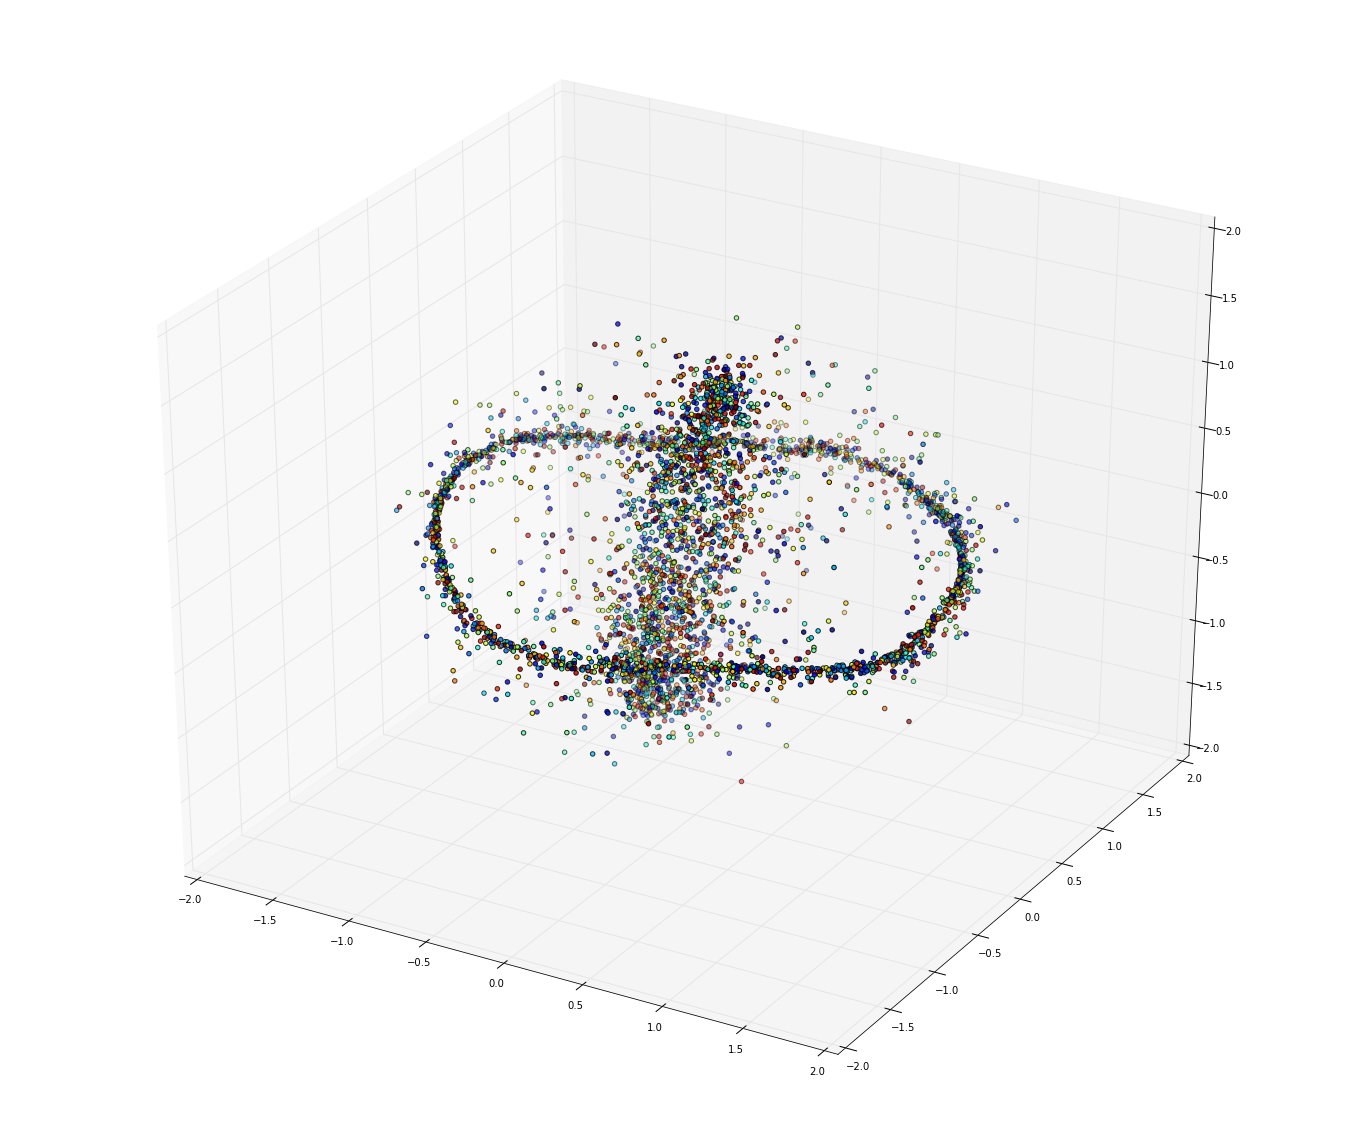

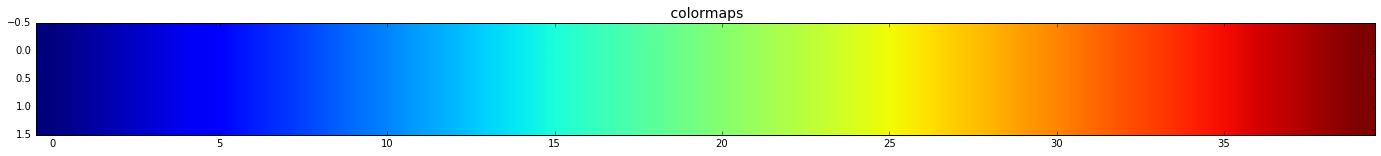

In [14]:
for t,traj1 in enumerate(traj_overtime):
    iso = manifold.Isomap(n_neighbors=70, n_components=3)

    ## transform different points, used for cross-validation. Doesn't really matter for figure.
    data = iso.fit(traj1).transform(traj1)

    ## figure
    colored_3d_plot(data)
    plt.show()